# COVID-19 Data analysis & visualization

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime, date, time, timedelta
from scipy import stats
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
# download the most recent COVID-19 dataset with wget using quite mode, timestamp (to only get the version diferent from local), and output directory
!wget -qNP data https://covid.ourworldindata.org/data/owid-covid-data.xlsx

In [3]:
import platform
from pathlib import Path, PureWindowsPath
# linux path
filename = Path("data/owid-covid-data.xlsx").resolve()
# windows path
if platform.system() == 'Windows':
    filename = PureWindowsPath(filename)

### II. NL

In [4]:
# initial date to start analysis with
begin_date = datetime.strptime('20-02-2021', '%d-%m-%Y')
end_date = date.today()

In [5]:
df = pd.read_excel(filename, engine='openpyxl', index_col="date", parse_dates=True)
df_nl = df.query('iso_code == "NLD"')
df_nl = df_nl[df_nl.new_cases < 300000]
df_nl.tail(10)

iso_code continent     location  total_cases  new_cases  \
date                                                                 
2022-06-22      NLD    Europe  Netherlands    8152549.0     4826.0   
2022-06-23      NLD    Europe  Netherlands    8158056.0     5507.0   
2022-06-24      NLD    Europe  Netherlands    8163222.0     5166.0   
2022-06-25      NLD    Europe  Netherlands    8163222.0        0.0   
2022-06-26      NLD    Europe  Netherlands    8163222.0        0.0   
2022-06-27      NLD    Europe  Netherlands    8176101.0    12879.0   
2022-06-28      NLD    Europe  Netherlands    8181879.0     5778.0   
2022-06-29      NLD    Europe  Netherlands    8188150.0     6271.0   
2022-06-30      NLD    Europe  Netherlands    8194662.0     6512.0   
2022-07-01      NLD    Europe  Netherlands    8200738.0     6076.0   

            new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
date                                                                            
2022-06-22            3985.000       22434.0         1.0                1.571   
2022-06-23            4176.571       22436.0         2.0                1.143   
2022-06-24            4363.429       22440.0         4.0                1.571   
2022-06-25            4363.429       22440.0         0.0                1.571   
2022-06-26            4363.429       22440.0         0.0                1.571   
2022-06-27            4738.714       22444.0         4.0                1.857   
2022-06-28            4879.429       22448.0         4.0                2.143   
2022-06-29            5085.857       22456.0         8.0                3.143   
2022-06-30            5229.429       22464.0         8.0                4.000   
2022-07-01            5359.429       22467.0         3.0                3.857   

            total_cases_per_million  new_cases_per_million  \
date                                                         
2022-06-22               474728.025                281.021   
2022-06-23               475048.701                320.676   
2022-06-24               475349.521                300.819   
2022-06-25               475349.521                  0.000   
2022-06-26               475349.521                  0.000   
2022-06-27               476099.473                749.952   
2022-06-28               476435.929                336.457   
2022-06-29               476801.094                365.164   
2022-06-30               477180.291                379.198   
2022-07-01               477534.101                353.809   

            new_cases_smoothed_per_million  total_deaths_per_million  \
date                                                                   
2022-06-22                         232.049                  1306.346   
2022-06-23                         243.204                  1306.462   
2022-06-24                         254.085                  1306.695   
2022-06-25                         254.085                  1306.695   
2022-06-26                         254.085                  1306.695   
2022-06-27                         275.938                  1306.928   
2022-06-28                         284.132                  1307.161   
2022-06-29                         296.153                  1307.627   
2022-06-30                         304.513                  1308.093   
2022-07-01                         312.083                  1308.267   

            new_deaths_per_million  new_deaths_smoothed_per_million  \
date                                                                  
2022-06-22                   0.058                            0.092   
2022-06-23                   0.116                            0.067   
2022-06-24                   0.233                            0.092   
2022-06-25                   0.000                            0.092   
2022-06-26                   0.000                            0.092   
2022-06-27                   0.233                            0.108   
2022-06-28         

In [6]:
# start = pd.to_datetime('2020-10-15', format="%Y-%m-%d")
# end = pd.to_datetime('today', format="%Y-%m-%d")
# df_nl[start:end]

In [7]:
pd.set_option('display.max_colwidth', None)
tmnl = pd.read_excel(os.path.join('data', 'tijdslijn_maatregelen_nl.xlsx'), engine='openpyxl', parse_dates=True)
tmnl

Datum                                      Beschrijving
0  2020-02-27                    Eerste besmetting met COVID-19
1  2020-03-06         Eerste overlijden als gevolg van COVID-19
2  2020-03-09            Regering komt met hygiene maatregelen 
3  2020-03-12                         Thuisblijven bij klachten
4  2020-03-15        Horeca, sportclubs, sauna's, e.d. gesloten
5  2020-03-16       Alle scholen / kinderdagverblijven gesloten
6  2020-03-23                       Start intelligente lockdown
7  2020-05-11             Basisscholen, kappers, zwembaden open
8  2020-06-01                   Horeca mag weer open (op 1,5 m)
9  2020-07-01                 Evenementen, OV weer toegankelijk
10 2020-09-01                                  Begin studiejaar
11 2020-10-13                            Gedeeltelijke lockdown
12 2020-11-03                    Extra beperkingen op bezoekers
13 2020-11-17                   Versoepelingen publieke ruimtes
14 2020-12-01                      Mondkapjesplicht (coronawet)
15 2020-12-14                                    Harde lockdown
16 2021-01-23                                         Avondklok
17 2021-04-30                       Avondklok af, terassen open
18 2021-05-19  Attractieparken, dierentuinen, sportscholen open
19 2021-06-26                    Mondkapjesverplichting vervalt
20 2021-09-25                        1.5-meter regel losgelaten

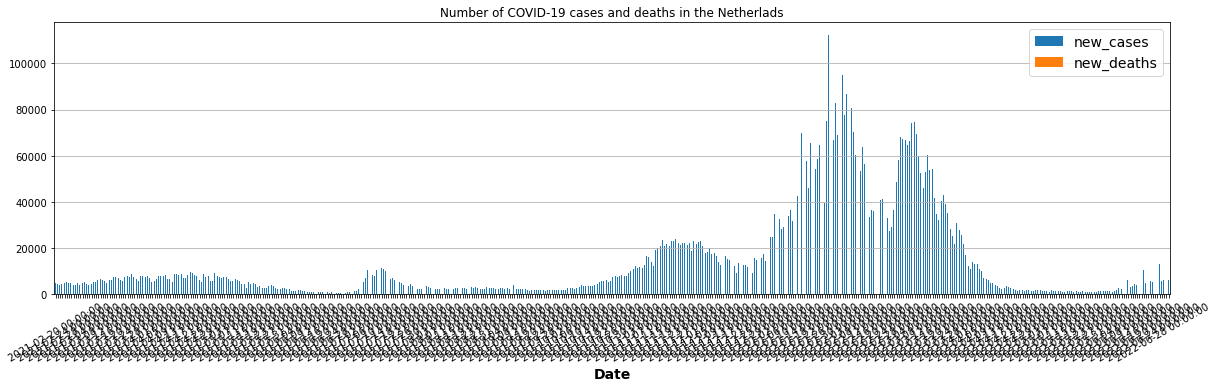

In [8]:
fig, ax = plt.subplots(figsize=(20,5))
df_nl[['new_cases', 'new_deaths']][begin_date.date():].plot(kind='bar', ax=ax, width=0.8, legend=True)
# fewer date ticks
every_nth = 4
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.title("Number of COVID-19 cases and deaths in the Netherlads")
plt.legend(loc='upper right', prop={'size': 14})
plt.xlabel('Date', fontsize=14, fontweight="bold")
plt.grid(axis='y') 
plt.xticks(rotation=30)
plt.show()

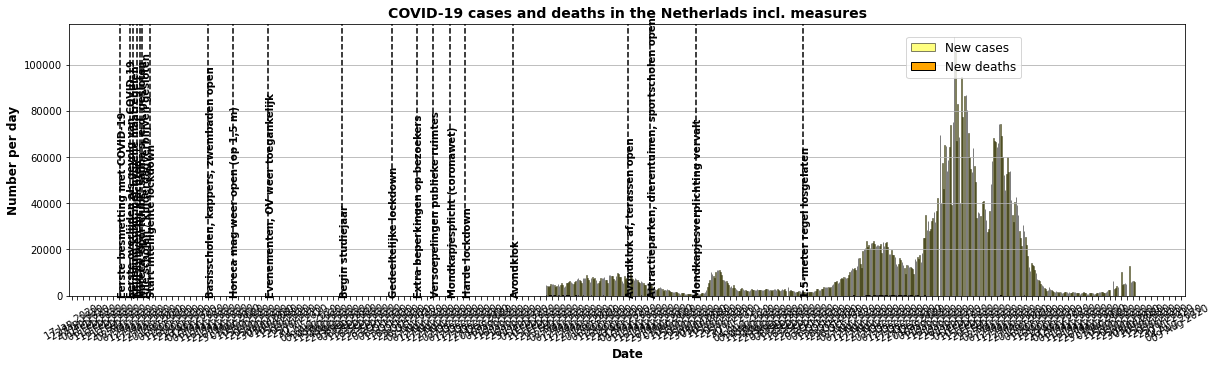

In [9]:
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(df_nl[begin_date.date():].index, df_nl[begin_date.date():]['new_cases'], width=0.5, alpha=0.5, color='yellow', edgecolor='black', align='center', label='New cases')
ax.bar(df_nl[begin_date.date():].index, df_nl[begin_date.date():]['new_deaths'], width=0.5, alpha=1.0, color='orange', edgecolor='black', align='center', label='New deaths')
# add timeline measures in NL 
for date, measure in zip(tmnl.Datum, tmnl.Beschrijving):
    ax.axvline(x=date.date(), ymax=df_nl['new_cases'].max(), color='black', linestyle='--')
    ax.text(date-timedelta(days=2)+(measure == "Alle scholen / kinderdagverblijven gesloten")*timedelta(days=2.5) \
            , 100, measure, color='black', fontsize=10, weight='heavy', rotation=90)
plt.title("COVID-19 cases and deaths in the Netherlads incl. measures", fontsize=14, fontweight="bold")
plt.legend(loc=(0.75, 0.8), prop={'size': 12})
plt.xlabel('Date', fontsize=12, fontweight="bold")
plt.ylabel('Number per day', fontsize=12, fontweight="bold")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b 2020'))
plt.xticks(rotation=30)
plt.grid(axis='y') 
if platform.system() == 'Windows':
    filename = "plots\covid-19_nl_incl_maatregelen.pdf"
else:
    filename = "plots/covid-19_nl_incl_maatregelen.pdf"
#plt.savefig(filename, papertype = 'a4', orientation = 'portrait', bbox_inches='tight')
plt.show()

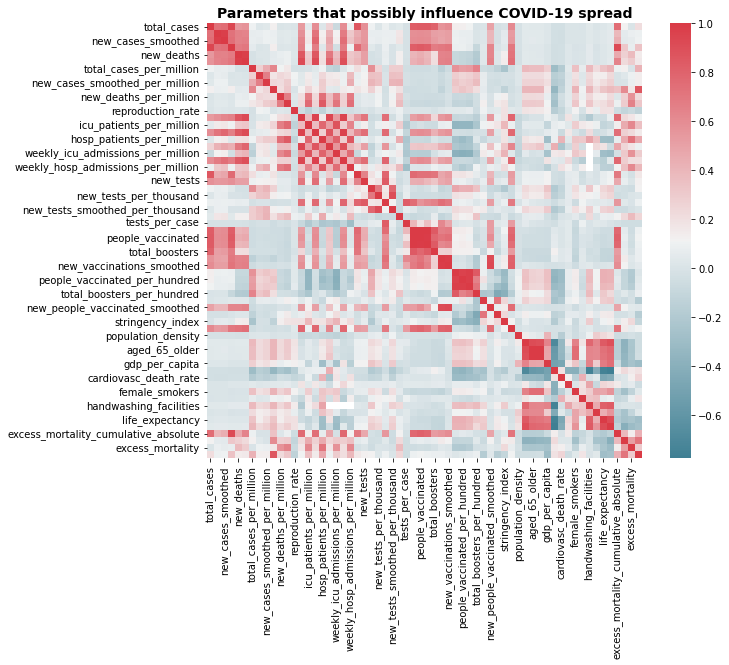

In [10]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr(method='pearson')
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title("Parameters that possibly influence COVID-19 spread", fontsize=14, fontweight="bold")
if platform.system() == 'Windows':
    filename = "plots\covid-19_parameters.pdf"
else:
    filename = "plots/covid-19_parameters.pdf"
#plt.savefig(filename, papertype = 'a4', orientation = 'portrait', bbox_inches='tight')
plt.show()

# Interactive plots

In [11]:
fig = px.bar(df_nl, x = df_nl.index, y = 'new_cases', title='New cases by date')
fig.update_traces(marker_color='orange')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [12]:
fig = px.bar(df_nl, x = df_nl.index, y = 'new_deaths', title='New deaths by date')
fig.update_traces(marker_color='red')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [13]:
fig = px.bar(df_nl, x = df_nl.index, y = 'new_vaccinations_smoothed', title='New vaccinations by date')
fig.update_traces(marker_color='green')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

# RIVM data

In [14]:
!wget -qNP data https://data.rivm.nl/covid-19/COVID-19_aantallen_gemeente_per_dag.csv

In [15]:
# linux path
filename = Path("data/COVID-19_aantallen_gemeente_per_dag.csv").resolve()
# windows path
if platform.system() == 'Windows':
    filename = PureWindowsPath(filename)

df = pd.read_csv(filename, sep=';', parse_dates=[1, 2], infer_datetime_format=True)
#df[df.Municipality_name == 'Amsterdam'].tail()
df.tail()

Version      Date_of_report Date_of_publication Municipality_code  \
318055        5 2022-07-01 10:00:00          2022-07-01               NaN   
318056        5 2022-07-01 10:00:00          2022-07-01               NaN   
318057        5 2022-07-01 10:00:00          2022-07-01               NaN   
318058        5 2022-07-01 10:00:00          2022-07-01               NaN   
318059        5 2022-07-01 10:00:00          2022-07-01               NaN   

       Municipality_name       Province Security_region_code  \
318055               NaN        Limburg                 VR24   
318056               NaN   Zuid-Holland                 VR15   
318057               NaN        Fryslân                 VR02   
318058               NaN  Noord-Holland                 VR11   
318059               NaN            NaN                  NaN   

        Security_region_name  Municipal_health_service  \
318055          Limburg-Zuid          GGD Zuid-Limburg   
318056            Haaglanden            GGD Haaglanden   
318057               Fryslân               GGD Fryslân   
318058  Zaanstreek-Waterland  GGD Zaanstreek/Waterland   
318059                   NaN                       NaN   

                              ROAZ_region  Total_reported  Deceased  
318055         Netwerk Acute Zorg Limburg               5         0  
318056            Netwerk Acute Zorg West               0         0  
318057  Acute Zorgnetwerk Noord Nederland               1         0  
318058                                NaN               2         0  
318059                                NaN               0         0

In [16]:
#np.sort(df.Municipality_name.unique().astype(str))

In [17]:
start = datetime.strptime('1-03-2021', '%d-%m-%Y')
df[df.Municipality_name == 'Amsterdam'][df.Date_of_publication >= start].groupby(['Date_of_publication', 'Municipality_name'])['Total_reported'].sum()

Date_of_publication  Municipality_name
2021-03-01           Amsterdam            186
2021-03-02           Amsterdam             94
2021-03-03           Amsterdam            334
2021-03-04           Amsterdam            134
2021-03-05           Amsterdam            222
                                         ... 
2022-06-27           Amsterdam            241
2022-06-28           Amsterdam            333
2022-06-29           Amsterdam            351
2022-06-30           Amsterdam            344
2022-07-01           Amsterdam            337
Name: Total_reported, Length: 488, dtype: int64

In [18]:
start = pd.to_datetime('2021-02-01', format="%Y-%m-%d")

(
 df[df.Municipality_name.notnull()][df.Date_of_publication >= start]  
 .groupby(['Date_of_publication', 'Municipality_name'])
 ['Total_reported'].sum()
 .reset_index()
 .groupby('Date_of_publication').apply(lambda x: x.nlargest(3, 'Total_reported')).reset_index(drop=True)
)

Date_of_publication Municipality_name  Total_reported
0             2021-02-01         Amsterdam             122
1             2021-02-01         Rotterdam             109
2             2021-02-01     's-Gravenhage              71
3             2021-02-02         Rotterdam             149
4             2021-02-02         Amsterdam             132
...                  ...               ...             ...
1543          2022-06-30         Rotterdam             271
1544          2022-06-30           Utrecht             199
1545          2022-07-01         Amsterdam             337
1546          2022-07-01         Rotterdam             207
1547          2022-07-01     's-Gravenhage             186

[1548 rows x 3 columns]

In [19]:
gemeenten = ["Amsterdam", "Rotterdam", "'s-Gravenhage", "Utrecht"]
#features = ['Total_reported', 'Hospital_admission', 'Deceased']
features = 'Total_reported'
df_sum = df[df.Municipality_name.isin(gemeenten)].groupby(['Date_of_publication', 'Municipality_name'])[features].sum().unstack()
df_sum.tail(10)

Municipality_name    's-Gravenhage  Amsterdam  Rotterdam  Utrecht
Date_of_publication                                              
2022-06-22                     138        288        156      136
2022-06-23                     189        377        241      153
2022-06-24                     174        269        192      156
2022-06-25                     188        340        161      118
2022-06-26                     131        243        203      133
2022-06-27                     126        241        112      122
2022-06-28                     159        333        145      153
2022-06-29                     156        351        246      160
2022-06-30                     181        344        271      199
2022-07-01                     186        337        207      115

In [20]:
check_date = datetime.strptime('01-10-2020', '%d-%m-%Y')

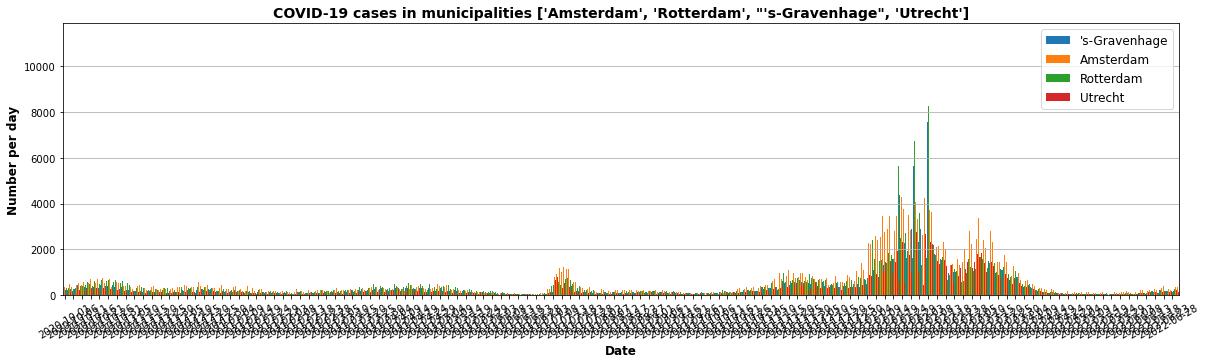

In [21]:
ax = df_sum[check_date.date():].plot.bar(figsize=(20,5), width=1.2)
plt.title(f"COVID-19 cases in municipalities {gemeenten}", fontsize=14, fontweight="bold")
plt.legend(loc='best', prop={'size': 12})
plt.xlabel('Date', fontsize=12, fontweight="bold")
plt.ylabel('Number per day', fontsize=12, fontweight="bold")
ax.set_xticks(range(0,len(df_sum[check_date.date():]), 5));
ax.set_xticklabels(["%s" % item for item in df_sum[check_date.date():].index.get_level_values(0).date.tolist()[::5]], rotation=30);
plt.grid(axis='y') 
plt.show()

In [22]:
# ax = df_sum.query('Date_of_publication > @begin_date').plot.bar(figsize=(20,5), width=1.2)
# plt.title(f"COVID-19 cases in municipality {gemeente}", fontsize=14, fontweight="bold")
# plt.legend(loc='best', prop={'size': 12})
# plt.xlabel('Date', fontsize=12, fontweight="bold")
# plt.ylabel('Number per day', fontsize=12, fontweight="bold")
# ax.set_xticks(range(0,len(df_sum), 5));
# ax.set_xticklabels(["%s" % item for item in df_sum.index.get_level_values(0).date.tolist()[::5]], rotation=30);
# plt.grid(axis='y') 
# plt.show()

In [23]:
!wget -qNP data https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv

In [24]:
# linux path
filename = Path('data/COVID-19_casus_landelijk.csv').resolve()
# windows path
if platform.system() == 'Windows':
    filename = PureWindowsPath(filename)

df_case = pd.read_csv(filename, sep=';', parse_dates=[0, 1], infer_datetime_format=True)
df_case.head()

Version           Date_file Date_statistics Date_statistics_type Agegroup  \
0       4 2022-07-01 10:00:00      2020-01-01                  DOO    40-49   
1       4 2022-07-01 10:00:00      2020-01-01                  DOO    50-59   
2       4 2022-07-01 10:00:00      2020-01-01                  DOO    20-29   
3       4 2022-07-01 10:00:00      2020-01-01                  DOO    60-69   
4       4 2022-07-01 10:00:00      2020-01-04                  DOO    10-19   

      Sex       Province Deceased  Week_of_death  \
0  Female  Noord-Holland       No            NaN   
1    Male     Gelderland       No            NaN   
2  Female   Zuid-Holland       No            NaN   
3  Female  Noord-Holland       No            NaN   
4  Female     Gelderland       No            NaN   

                             Municipal_health_service  
0                                       GGD Amsterdam  
1  Veiligheids- en Gezondheidsregio Gelderland-Midden  
2                                 GGD Hollands-Midden  
3                                GGD Hollands-Noorden  
4                                 GGD Gelderland-Zuid

<AxesSubplot:xlabel='Sex,Agegroup'>

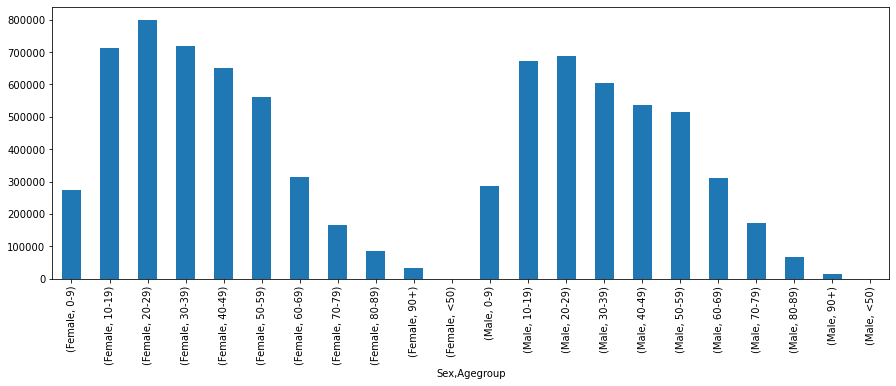

In [25]:
df_case[df_case.Sex.isin(['Male', 'Female'])][df_case.Agegroup != 'Unknown'].groupby(['Sex', 'Agegroup']).size().plot.bar(figsize=(15,5))

In [26]:
# from scipy.stats import ttest_ind
# ttest_ind(df_case[df_case.Sex == 'Male']['Hospital_admission'].values, df_case[df_case.Sex == 'Female']['Hospital_admission'].values)

In [27]:
# import seaborn as sns
# g = sns.catplot(x = "Agegroup", # x variable name
#             y = "Hospital_admission",       # y variable name
#             hue = "Sex",  # group variable name
#             data = df_case[df_case.Sex.isin(['Male', 'Female'])][df_case.Agegroup != 'Unknown'],     # dataframe to plot
#             kind = "bar")
# g.despine(left=True)
# g.set_axis_labels("Gender", "Count")
# g.legend.set_title("")

# Predictive modelling

### II. NL (forecasting)

In [28]:
df_nl.describe()

total_cases      new_cases  new_cases_smoothed  total_deaths  \
count  8.550000e+02     855.000000          850.000000    847.000000   
mean   2.250584e+06    9146.595322         9488.411262  14286.142857   
std    2.622543e+06   15887.280016        17100.204434   6681.931754   
min    1.000000e+00       0.000000            5.429000      1.000000   
25%    1.166900e+05    1023.500000         1057.250000   6473.500000   
50%    1.498578e+06    3858.000000         3911.000000  17216.000000   
75%    2.636678e+06    8171.000000         8106.893000  19511.500000   
max    8.200738e+06  112227.000000       125321.000000  22467.000000   

       new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  842.000000           833.000000               855.000000   
mean    26.705463            26.955598            131052.901226   
std     35.055637            31.846881            152712.347411   
min      0.000000             0.429000                 0.058000   
25%      4.000000             4.429000              6794.931500   
50%     12.000000            12.714000             87263.134000   
75%     35.000000            42.143000            153535.437500   
max    234.000000           154.286000            477534.101000   

       new_cases_per_million  new_cases_smoothed_per_million  \
count             855.000000                      850.000000   
mean              532.611973                      552.516104   
std               925.126248                      995.755580   
min                 0.000000                        0.316000   
25%                59.599000                       61.564500   
50%               224.654000                      227.740000   
75%               475.802500                      472.069000   
max              6535.048000                     7297.520000   

       total_deaths_per_million  new_deaths_per_million  \
count                847.000000              842.000000   
mean                 831.891028                1.555046   
std                  389.093078                2.041331   
min                    0.058000                0.000000   
25%                  376.956000                0.233000   
50%                 1002.498000                0.699000   
75%                 1136.167000                2.038000   
max                 1308.267000               13.626000   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                       833.000000         844.000000    826.000000   
mean                          1.569633           1.061860    351.506053   
std                           1.854450           0.378752    299.502825   
min                           0.025000           0.360000      7.000000   
25%                           0.258000           0.820000    106.000000   
50%                           0.740000           0.990000    225.000000   
75%                           2.454000           1.280000    567.750000   
max                           8.984000           2.830000   1424.000000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count                826.000000     826.000000                 826.000000   
mean                  20.468431    1040.772397                  60.604817   
std                   17.440229     702.768373                  40.922616   
min                    0.408000       1.000000                   0.058000   
25%                    6.172000     403.250000                  23.481500   
50%                   13.102000    1105.500000                  64.374000   
75%                   33.060500    1599.000000                  93.110750   
max                   82.920000    3284.000000                 191.229000   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             581.000000                         581.000000   
mean              163.203098                           9.503427   
std               103.399894                           6.021047   
min     

In [29]:
print("% of nan values per column")
for column in df_nl.columns:
    print(f"{column}: {df_nl[column].isna().sum()} / {len(df_nl)}")

% of nan values per column
iso_code: 0 / 855
continent: 0 / 855
location: 0 / 855
total_cases: 0 / 855
new_cases: 0 / 855
new_cases_smoothed: 5 / 855
total_deaths: 8 / 855
new_deaths: 13 / 855
new_deaths_smoothed: 22 / 855
total_cases_per_million: 0 / 855
new_cases_per_million: 0 / 855
new_cases_smoothed_per_million: 5 / 855
total_deaths_per_million: 8 / 855
new_deaths_per_million: 13 / 855
new_deaths_smoothed_per_million: 22 / 855
reproduction_rate: 11 / 855
icu_patients: 29 / 855
icu_patients_per_million: 29 / 855
hosp_patients: 29 / 855
hosp_patients_per_million: 29 / 855
weekly_icu_admissions: 274 / 855
weekly_icu_admissions_per_million: 274 / 855
weekly_hosp_admissions: 274 / 855
weekly_hosp_admissions_per_million: 274 / 855
total_tests: 106 / 855
new_tests: 106 / 855
total_tests_per_thousand: 106 / 855
new_tests_per_thousand: 106 / 855
new_tests_smoothed: 113 / 855
new_tests_smoothed_per_thousand: 113 / 855
positive_rate: 112 / 855
tests_per_case: 112 / 855
tests_units: 106 / 855

In [30]:
data = df_nl.drop(['iso_code', 'continent', 'location', 'new_tests', 'new_tests_per_thousand', 'total_tests', 'total_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units', 'extreme_poverty', 'handwashing_facilities'], axis=1)

# Prediction with Prophet 

In [31]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

In [32]:
X = (
    df_nl[pd.to_datetime('2021-01-23', format="%Y-%m-%d"):]
    ['new_cases']
    .reset_index()
    .rename(columns = {'date':'ds', 'new_cases': 'y'})
)

In [33]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(X)

In [34]:
future = m.make_future_dataframe(periods=5)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower    yhat_upper
524 2022-07-02  4112.669931 -4638.202860  12550.679163
525 2022-07-03  3794.417175 -4111.221666  12274.609022
526 2022-07-04  3030.938458 -5227.969898  11800.009591
527 2022-07-05  4519.468254 -4481.893210  13325.030095
528 2022-07-06  5666.897524 -3735.401745  13669.500514

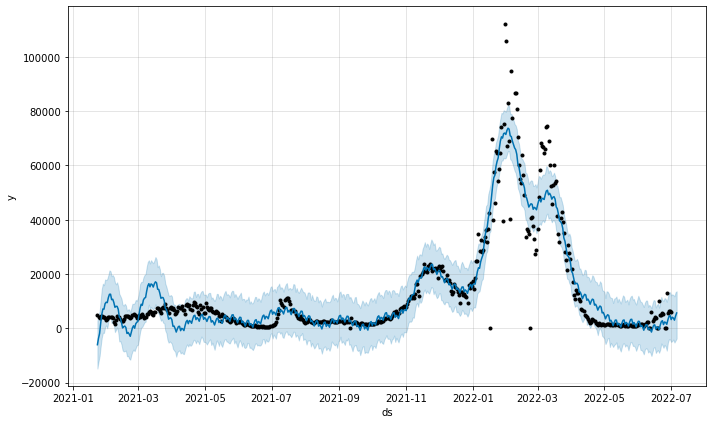

In [35]:
fig1 = m.plot(forecast)

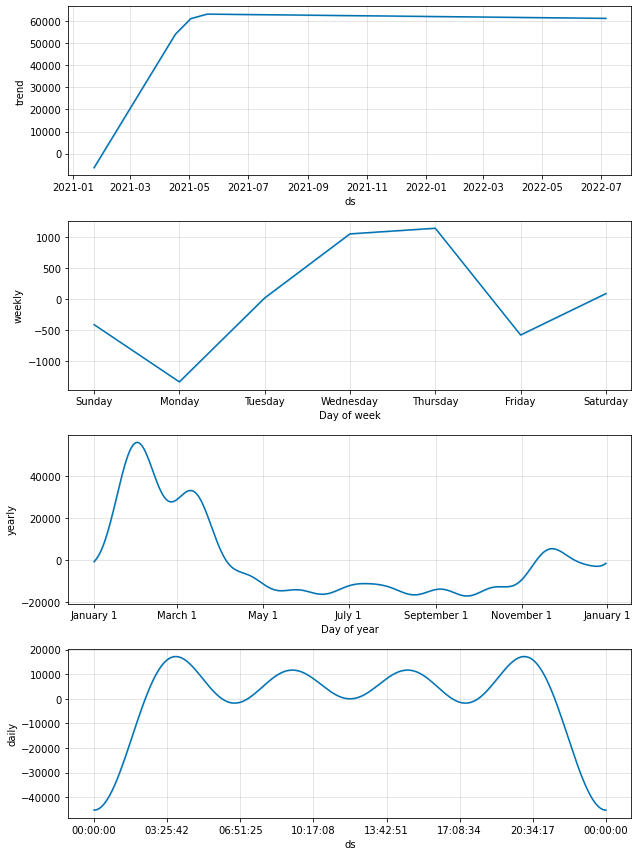

In [36]:
fig2 = m.plot_components(forecast)

In [37]:
plot_plotly(m, forecast)

In [38]:
plot_components_plotly(m, forecast)